In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
df = pd.read_csv('/mnt/data/malware_preprocessed.csv')

# 2. Ubah kolom object menjadi float jika memungkinkan
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = df[col].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
            df[col] = df[col].astype(float)
        except:
            print(f"Kolom '{col}' tidak bisa dikonversi otomatis")

# 3. Tangani missing values
df = df.dropna()  # Bisa juga df.fillna(method='ffill')

# 4. Pisahkan fitur dan target
X = df.drop('label', axis=1)  # Ganti 'label' jika kolom targetmu punya nama lain
y = df['label']

# 5. Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/malware_preprocessed.csv'

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
df = pd.read_csv('/mnt/data/malware_preprocessed.csv')

# 2. Ubah kolom object menjadi float (jika memungkinkan)
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            # Bersihkan angka dari format seperti 3.137.126.766.468.760 → 3137126766468760.0
            df[col] = df[col].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
            df[col] = df[col].astype(float)
        except:
            print(f"Kolom '{col}' tidak bisa dikonversi otomatis")

# 3. Tangani missing values
df = df.dropna()

# 4. Pisahkan fitur dan target
X = df.drop('label', axis=1)  # Ganti 'label' jika nama kolom target berbeda
y = df['label']

# 5. Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Cek hasil
print("Preprocessing selesai. Jumlah data:", df.shape)
print("Contoh fitur setelah normalisasi:\n", X_scaled[:5])


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/malware_preprocessed.csv'

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
df = pd.read_csv('/mnt/data/malware_preprocessed.csv')

# 2. Ubah kolom object ke float (jika bisa)
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            # Hapus titik pemisah ribuan dan ganti koma menjadi titik desimal
            df[col] = df[col].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
            df[col] = df[col].astype(float)
        except:
            print(f"Kolom '{col}' tidak bisa dikonversi ke float.")

# 3. Hapus baris yang memiliki missing values
df = df.dropna()

# 4. Pisahkan fitur dan label
X = df.drop('label', axis=1)  # Ganti 'label' jika nama kolom target berbeda
y = df['label']

# 5. Normalisasi fitur (standardisasi)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Cek hasil preprocessing
print("✅ Preprocessing selesai.")
print("Jumlah data:", df.shape)
print("Contoh fitur setelah normalisasi:")
print(X_scaled[:5])


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/malware_preprocessed.csv'

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# --- 1. Load Data ---
df = pd.read_csv('malware_preprocessed.csv', sep=';', on_bad_lines='skip')

# --- 2. Salin DataFrame untuk preprocessing ---
df_cleaned = df.copy()

# --- 3. Ubah kolom numerik dari teks (object) ke float ---
exclude_cols = ['state', 'classification']
object_cols = [col for col in df_cleaned.select_dtypes(include='object').columns if col not in exclude_cols]

for col in object_cols:
    df_cleaned[col] = (
        df_cleaned[col]
        .str.replace('.', '', regex=False)  # Hapus titik ribuan
        .str.replace(',', '.', regex=False)  # Ganti koma jadi titik desimal
        .astype(float)  # Konversi ke float
    )

# --- 4. Encode kolom kategorikal ('state') ---
le = LabelEncoder()
df_cleaned['state'] = le.fit_transform(df_cleaned['state'])

# --- 5. Pisahkan fitur dan label ---
X = df_cleaned.drop('classification', axis=1)
y = df_cleaned['classification']

# --- 6. Normalisasi fitur numerik ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Sekarang X_scaled dan y sudah siap untuk training model
print("Preprocessing selesai.")
print("Ukuran fitur (X):", X_scaled.shape)
print("Jumlah label (y):", y.shape)


Preprocessing selesai.
Ukuran fitur (X): (100000, 33)
Jumlah label (y): (100000,)


Jumlah baris dan kolom: (100000, 34)

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   millisecond        100000 non-null  float64
 1   state              100000 non-null  int64  
 2   usage_counter      100000 non-null  float64
 3   prio               100000 non-null  float64
 4   static_prio        100000 non-null  float64
 5   normal_prio        100000 non-null  float64
 6   policy             100000 non-null  float64
 7   vm_pgoff           100000 non-null  float64
 8   vm_truncate_count  100000 non-null  float64
 9   task_size          100000 non-null  float64
 10  cached_hole_size   100000 non-null  float64
 11  free_area_cache    100000 non-null  float64
 12  mm_users           100000 non-null  float64
 13  map_count          100000 non-null  float64
 14  hiwater_rss        100000 non-null  float64
 15  

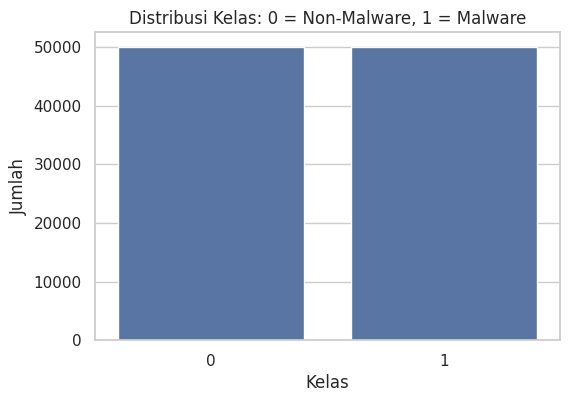

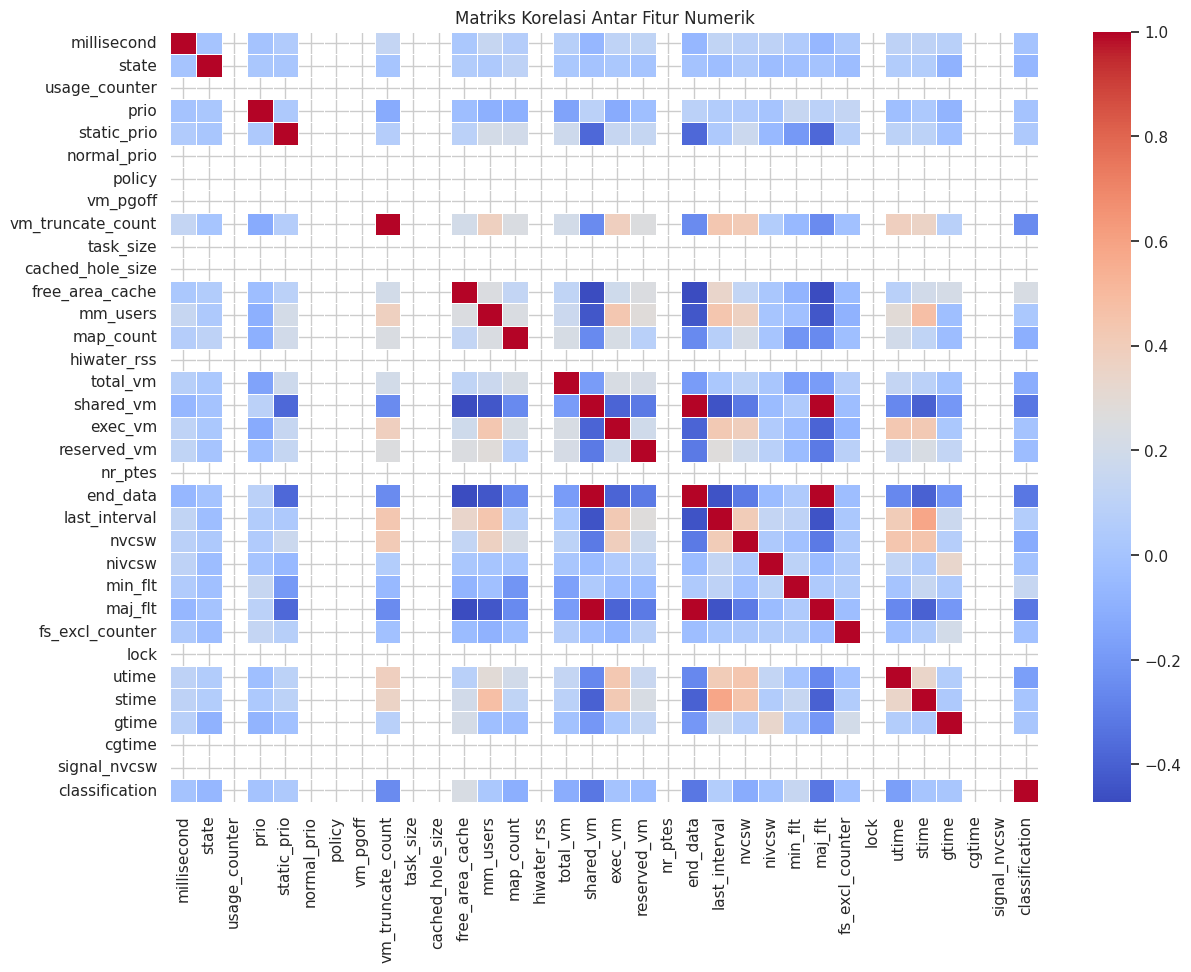

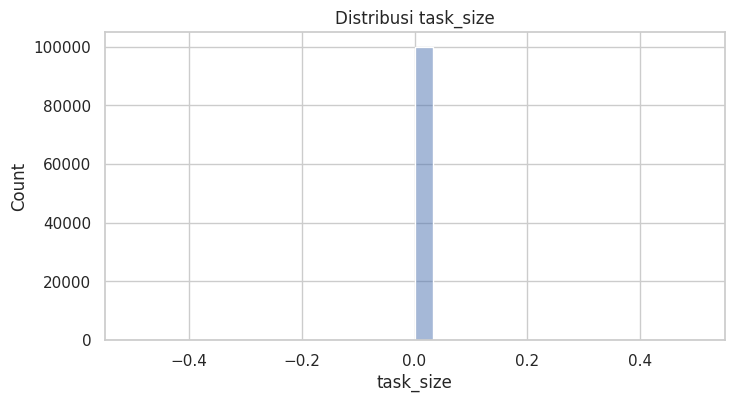

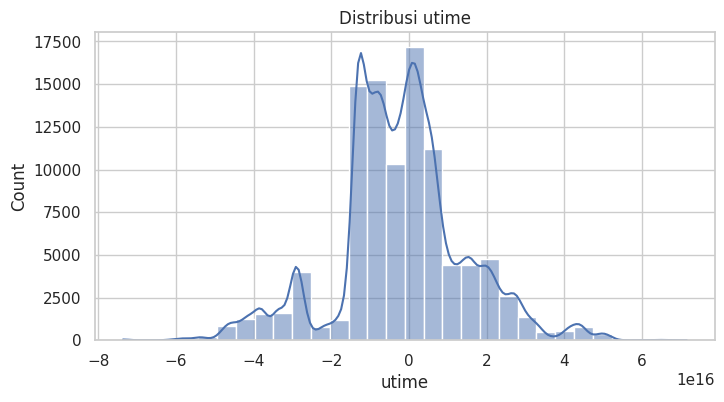

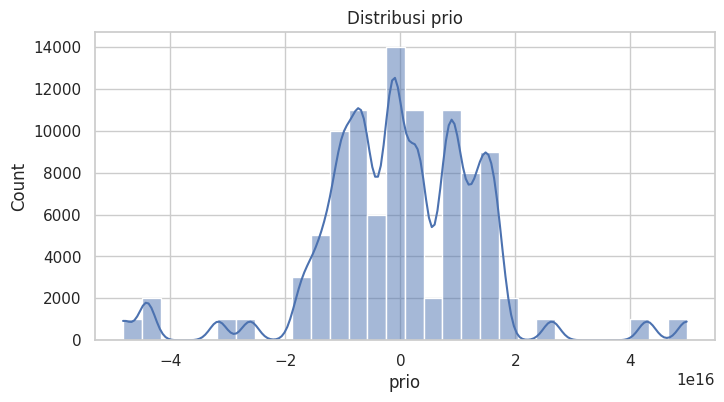

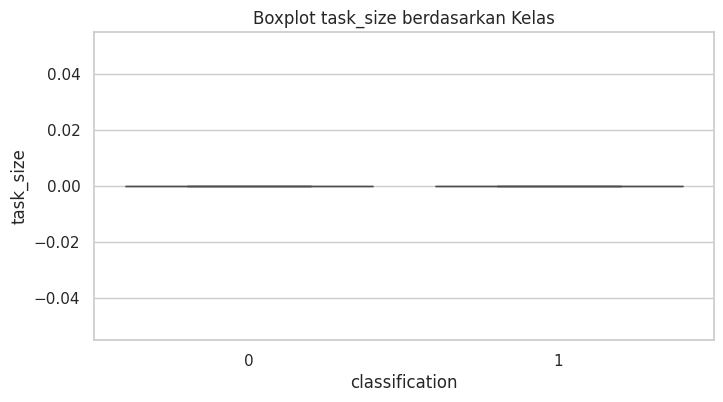

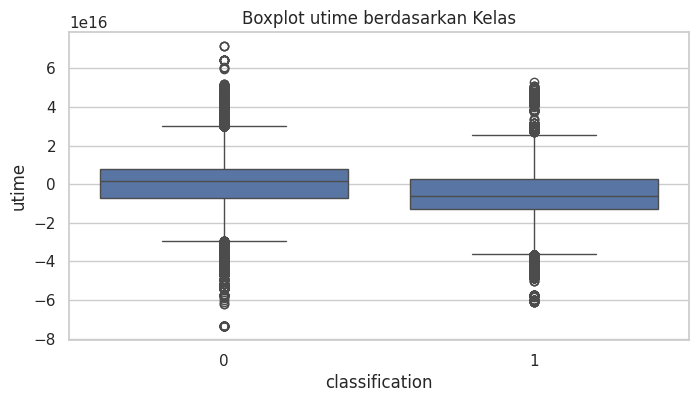

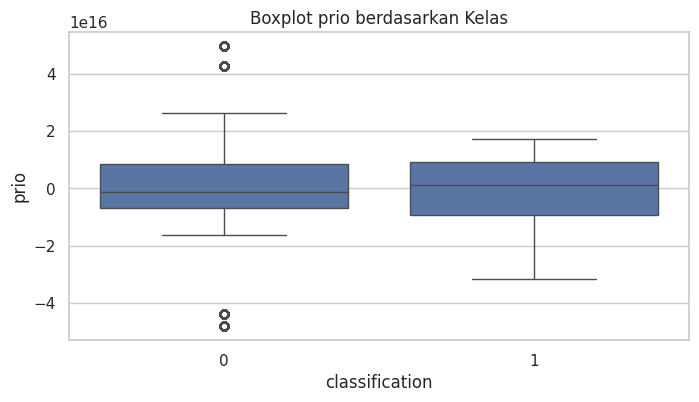

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aktifkan tampilan grafik yang bersih
sns.set(style="whitegrid")

# --- 1. Informasi Umum Dataset ---
print("Jumlah baris dan kolom:", df_cleaned.shape)
print("\nInfo Dataset:")
print(df_cleaned.info())

print("\nCek nilai null per kolom:")
print(df_cleaned.isnull().sum())

# --- 2. Statistik Deskriptif ---
print("\nStatistik Deskriptif:")
print(df_cleaned.describe())

# --- 3. Distribusi Kelas Target (classification: 0=normal, 1=malware) ---
plt.figure(figsize=(6,4))
sns.countplot(x='classification', data=df_cleaned)
plt.title("Distribusi Kelas: 0 = Non-Malware, 1 = Malware")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.show()

# --- 4. Korelasi Antar Fitur Numerik ---
plt.figure(figsize=(14,10))
sns.heatmap(df_cleaned.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Matriks Korelasi Antar Fitur Numerik")
plt.show()

# --- 5. Histogram Fitur Penting ---
fitur_penting = ['task_size', 'utime', 'prio']  # Ganti dengan fitur relevan dari dataset Anda

for fitur in fitur_penting:
    plt.figure(figsize=(8,4))
    sns.histplot(df_cleaned[fitur], kde=True, bins=30)
    plt.title(f"Distribusi {fitur}")
    plt.show()

# --- 6. Boxplot Fitur Berdasarkan Kelas ---
for fitur in fitur_penting:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='classification', y=fitur, data=df_cleaned)
    plt.title(f"Boxplot {fitur} berdasarkan Kelas")
    plt.show()


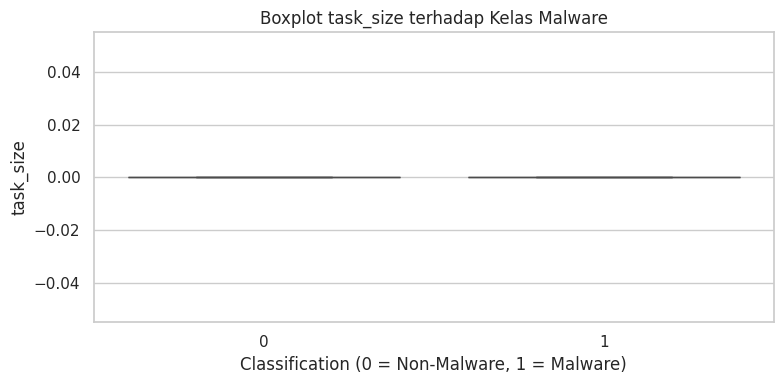

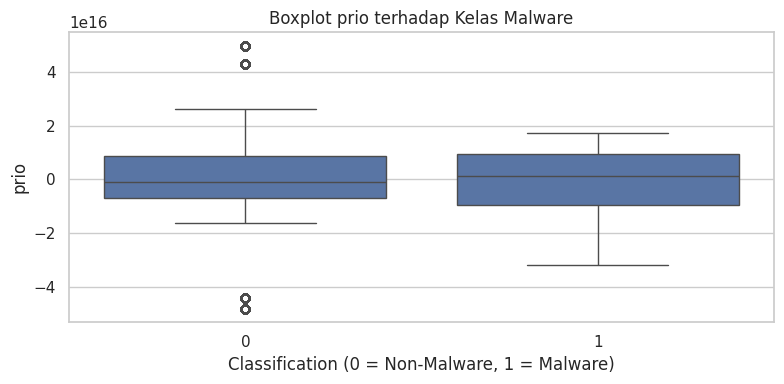

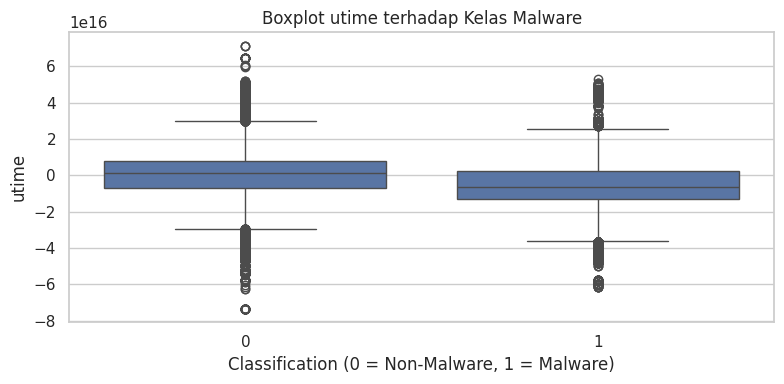

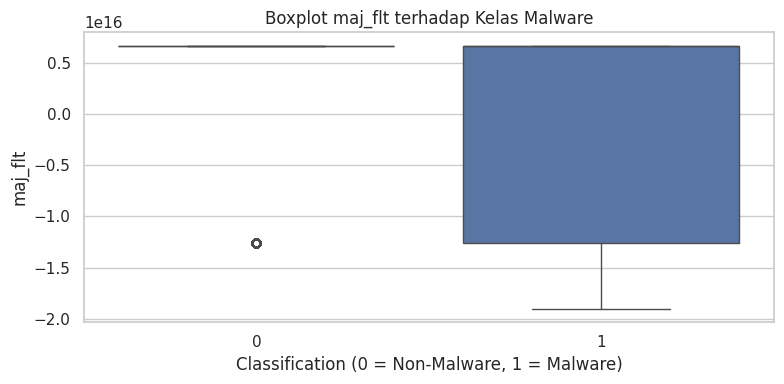

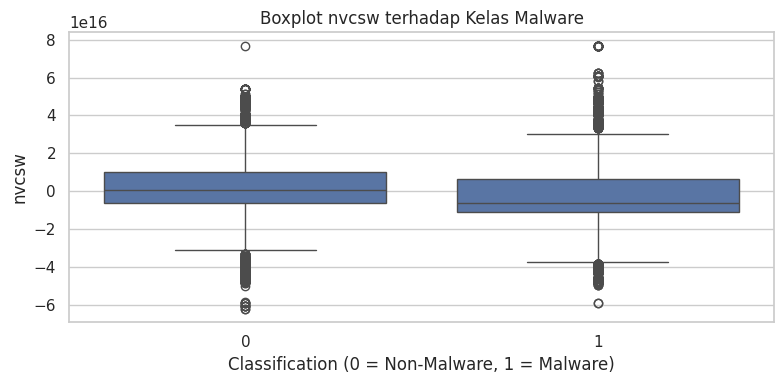

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar beberapa fitur numerik yang ingin dianalisis
fitur_terpilih = ['task_size', 'prio', 'utime', 'maj_flt', 'nvcsw']  # Ubah sesuai dataset Anda

# Plot boxplot untuk tiap fitur terhadap kelas
for fitur in fitur_terpilih:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='classification', y=fitur, data=df_cleaned)
    plt.title(f'Boxplot {fitur} terhadap Kelas Malware')
    plt.xlabel('Classification (0 = Non-Malware, 1 = Malware)')
    plt.ylabel(fitur)
    plt.tight_layout()
    plt.show()


In [7]:
from sklearn.feature_selection import SelectKBest, f_classif

# Misalnya X dan y sudah Anda definisikan:
# X = df_cleaned.drop('classification', axis=1)
# y = df_cleaned['classification']

# Pilih 10 fitur terbaik berdasarkan ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
X_kbest = selector.fit_transform(X, y)

# Dapatkan nama-nama fitur yang dipilih
selected_feature_names = X.columns[selector.get_support()]
print("Fitur terbaik yang dipilih:")
print(selected_feature_names.tolist())


Fitur terbaik yang dipilih:
['vm_truncate_count', 'free_area_cache', 'map_count', 'total_vm', 'shared_vm', 'end_data', 'nvcsw', 'min_flt', 'maj_flt', 'utime']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 2  5  6  7  9 10 14 19 27 31 32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lakukan PCA untuk mempertahankan 95% variansi
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Jumlah komponen utama setelah PCA:", X_pca.shape[1])



Jumlah komponen utama setelah PCA: 18


In [9]:
from sklearn.model_selection import train_test_split

# Split data: 80% untuk training, 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Cek hasil split
print("Ukuran X_train :", X_train.shape)
print("Ukuran X_test  :", X_test.shape)
print("Distribusi label y_train:")
print(y_train.value_counts(normalize=True))
print("Distribusi label y_test:")
print(y_test.value_counts(normalize=True))


Ukuran X_train : (80000, 33)
Ukuran X_test  : (20000, 33)
Distribusi label y_train:
classification
0    0.5
1    0.5
Name: proportion, dtype: float64
Distribusi label y_test:
classification
1    0.5
0    0.5
Name: proportion, dtype: float64


In [10]:
from sklearn.svm import SVC

# Inisialisasi model SVM dengan kernel RBF (default)
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Latih model pada data training
svm_model.fit(X_train, y_train)

# Prediksi data uji
y_pred = svm_model.predict(X_test)


In [11]:
from sklearn.svm import SVC

# Inisialisasi model SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Latih model menggunakan data latih
svm_model.fit(X_train, y_train)

# Prediksi (opsional, digunakan nanti untuk evaluasi)
y_pred = svm_model.predict(X_test)

print("✅ Model klasifikasi SVM berhasil dibangun dan dilatih.")


✅ Model klasifikasi SVM berhasil dibangun dan dilatih.


In [12]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Prediksi data uji
y_pred = svm_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Ekstrak nilai TP, TN, FP, FN
TN, FP, FN, TP = cm.ravel()
print(f"True Positive (TP): {TP}")
print(f"False Positive (FP): {FP}")
print(f"True Negative (TN): {TN}")
print(f"False Negative (FN): {FN}")

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- Evaluation Metrics ---")
print(f"Akurasi    : {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision  : {precision:.4f}")
print(f"Recall     : {recall:.4f}")
print(f"F1-score   : {f1:.4f}")


Confusion Matrix:
[[9976   24]
 [  62 9938]]
True Positive (TP): 9938
False Positive (FP): 24
True Negative (TN): 9976
False Negative (FN): 62

--- Evaluation Metrics ---
Akurasi    : 0.9957 (99.57%)
Precision  : 0.9976
Recall     : 0.9938
F1-score   : 0.9957


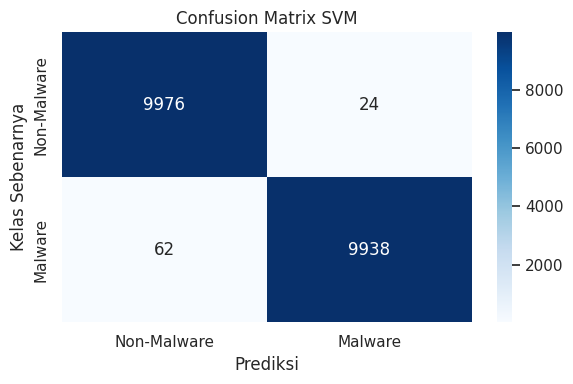

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Malware', 'Malware'],
            yticklabels=['Non-Malware', 'Malware'])
plt.xlabel('Prediksi')
plt.ylabel('Kelas Sebenarnya')
plt.title('Confusion Matrix SVM')
plt.tight_layout()
plt.show()


In [14]:
from sklearn.feature_selection import SelectKBest, f_classif

# Pilih 10 fitur terbaik (ubah k sesuai kebutuhan)
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Tampilkan nama fitur yang dipilih
selected_feature_names = X.columns[selector.get_support()]
print("Fitur terbaik yang dipilih:")
print(selected_feature_names.tolist())

# Optional: ubah X jadi versi fitur terpilih
X = pd.DataFrame(X_selected, columns=selected_feature_names)


Fitur terbaik yang dipilih:
['vm_truncate_count', 'free_area_cache', 'map_count', 'total_vm', 'shared_vm', 'end_data', 'nvcsw', 'min_flt', 'maj_flt', 'utime']


In [18]:
import pandas as pd
import numpy as np

# 1. Pisahkan fitur dan label
X = df_cleaned.drop('classification', axis=1)
y = df_cleaned['classification']

# 2. Gabungkan fitur dan label untuk korelasi
df_corr = df_cleaned.copy()
df_corr['classification'] = y

# 3. Hitung korelasi fitur numerik dengan target
correlations = df_corr.corr(numeric_only=True)['classification'].drop('classification')

# 4. Ambil fitur dengan korelasi > 0.1
selected_features = correlations[correlations.abs() > 0.1].sort_values(ascending=False)

print("Top 10 fitur paling berkorelasi dengan target:")
print(selected_features.head(10))
print("\nFitur yang dipilih (korelasi > 0.1):", len(selected_features), "fitur")

# 5. Gunakan hanya fitur terpilih untuk X
X_selected = X[selected_features.index]


Top 10 fitur paling berkorelasi dengan target:
free_area_cache      0.235245
min_flt              0.146906
map_count           -0.105944
total_vm            -0.109696
nvcsw               -0.119221
utime               -0.173979
vm_truncate_count   -0.252002
shared_vm           -0.324954
end_data            -0.324954
maj_flt             -0.324954
Name: classification, dtype: float64

Fitur yang dipilih (korelasi > 0.1): 10 fitur
